### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Summer 2022 ###

# Bloons Tower Defense Optimization #

#### Patrick McCarty (psmccarty@wisc.edu) ####

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

Bloons Tower Defense(BTD) is a [tower defense](https://en.wikipedia.org/wiki/Tower_defense) video game where the player must pop a set of balloons before they reach the end of a predetermined path. There are various [towers][1] each with unique strengths and weaknesses that the player can purchase and place along the path of the balloons in order to pop them. The player earns money by popping balloons and surviving rounds, resources are limited however, so the player must choose wisely which towers to buy and where to put them. The game has 50 rounds where higher rounds bring with them a higher quantity of balloons making more firepower necessary to defeat them.

[1]: http://bloons.fandom.com/wiki/Bloons_Tower_Defense_(Game)#Towers

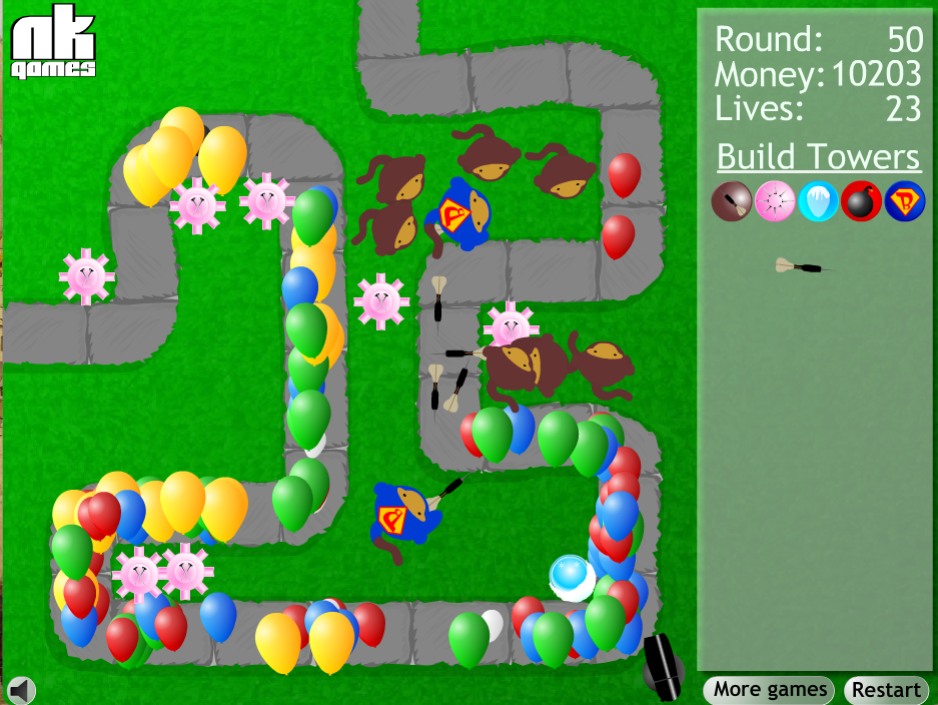

[Winning the game](https://bloons.fandom.com/wiki/Bloons_Tower_Defense_1_Map/Strategies#:~:text=Advertisement-,Strategy%201,range%20darts%20in%20that%20order.) isn’t particularly hard since the [number of balloons in each round][2] is predetermined and so is the damage and range that each tower has. This means that there must be an optimal selection of towers and placements for which we spend the least amount of money while still winning the game. This is the problem this project aims to solve.

[2]: https://bloons.fandom.com/wiki/Rounds_(pre-BTD5)#Bloons_Tower_Defense_Rounds

Most of the data for this model such as cost of towers and number of balloons per round were acquired from the [Bloons wiki](https://bloons.fandom.com/wiki/Bloons_Wiki). Specific information about the range of towers and how much damage they do was not present in the wiki or any other online resource I looked into. For those numbers I used my own experience with the game to approximate what I believe the values should be.

### Specifics ###
 
The game map will be represented by a 13x13 matrix where the "#" make up the path the balloons take (each entry will be referred to as a "path tile") and "."'s are the spaces where towers can be placed.  

|   |   |   |   |   |   | e |   |   |   |   |   |   | 
| - | - | - | - | - | - | - | - | - | - | - | - | - |
| . | . | . | . | . | . | # | . | . | . | . | . | . |
| . | . | . | . | . | . | # | # | # | # | # | # | # |
| . | . | . | . | . | . | . | . | . | . | . | . | # |
| . | . | # | # | # | # | . | . | . | . | . | . | # |
| . | . | # | . | . | # | . | . | . | . | . | . | # |
| . | . | # | . | . | # | . | # | # | # | # | # | # |
| # | # | # | . | . | # | . | # | . | . | . | . | . |
| . | . | . | . | . | # | . | # | . | . | . | . | . |
| . | . | . | . | . | # | . | # | # | # | # | # | # |
| . | . | . | . | . | # | . | . | . | . | . | . | # |
| . | # | # | # | # | # | . | . | . | . | . | . | # |
| . | # | . | . | . | . | . | . | . | . | . | . | # |
| . | # | # | # | # | # | # | # | # | # | # | # | # |
            


The three towers a player can use in this simplified version of BTD is the Dart tower(brown monkey in the image above), Tack Tower(pink circle) and the Super Monkey(monkey with blue clothes and a yellow and red diamond symbol). The Dart tower and Tack tower will have optional upgrades that increase their damage. Each tower attacks in a unique way therefore their damage calculations will all be different.

The Dart tower has a medium range; its range will be the following.

|   |   |   |   |   |   |   |
| - | - | - | - | - | - | - |
| . | . | . | . | . | . | . |
| . | . | 1 | 1 | 1 | . | . |
| . | 1 | 1 | 1 | 1 | 1 | . |
| . | 1 | 1 | D | 1 | 1 | . |
| . | 1 | 1 | 1 | 1 | 1 | . |
| . | . | 1 | 1 | 1 | . | . |
| . | . | . | . | . | . | . |

Meaning that if a path tile is located where a 1 is, then any balloons on that tile can be attacked by the Dart tower. 



The Tack tower has a small range.

|   |   |   |   |   |   |   |
| - | - | - | - | - | - | - |
| . | . | . | . | . | . | . |
| . | . | . | . | . | . | . |
| . | . | 1 | 1 | 1 | . | . |
| . | . | 1 | T | 1 | . | . |
| . | . | 1 | 1 | 1 | . | . |
| . | . | . | . | . | . | . |
| . | . | . | . | . | . | . |

Finally the Super Monkey has the largest range of all.

|   |   |   |   |   |   |   |
| - | - | - | - | - | - | - |
| . | . | 1 | 1 | 1 | . | . |
| . | 1 | 1 | 1 | 1 | 1 | . |
| 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| 1 | 1 | 1 | S | 1 | 1 | 1 |
| 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| . | 1 | 1 | 1 | 1 | 1 | . |
| . | . | 1 | 1 | 1 | . | . |


The greater the number of path tiles in range of a tower, the more balloons a tower can hit at once and it can hit them for longer. The number of path tiles in range of each location on the map can be represented by a matrix as well. The Tack towers range matrix is this.

|   |   |   |   |   |   | e |   |   |   |   |   |   | 
| - | - | - | - | - | - | - | - | - | - | - | - | - |
| 0 | 0 | 0 | 0 | 0 | 2 | # | 4 | 3 | 3 | 3 | 3 | 2 | 
| 0 | 0 | 0 | 0 | 0 | 2 | # | # | # | # | # | # | # |
| 0 | 1 | 2 | 3 | 3 | 3 | 3 | 3 | 3 | 3 | 3 | 5 | # |
| 0 | 2 | # | # | # | # | 2 | 0 | 0 | 0 | 0 | 3 | # |
| 0 | 3 | # | 5 | 5 | # | 4 | 2 | 3 | 3 | 3 | 5 | # |
| 2 | 5 | # | 3 | 3 | # | 5 | # | # | # | # | # | # |
| # | # | # | 2 | 3 | # | 6 | # | 5 | 3 | 3 | 3 | 2 |
| 2 | 3 | 2 | 1 | 3 | # | 6 | # | 5 | 3 | 3 | 3 | 2 |
| 0 | 0 | 0 | 0 | 3 | # | 5 | # | # | # | # | # | # |
| 1 | 2 | 3 | 3 | 5 | # | 4 | 2 | 3 | 3 | 3 | 5 | # |
| 2 | # | # | # | # | # | 2 | 0 | 0 | 0 | 0 | 3 | # |
| 3 | # | 7 | 6 | 6 | 5 | 4 | 3 | 3 | 3 | 3 | 5 | # |
| 2 | # | # | # | # | # | # | # | # | # | # | # | # |



Similar matrices are generated for the other two towers.

The damage each tower does will be of function of how many path tiles are in range. The Dart monkey shoots one dart at a time so its function will be the natural log of the number of path tiles in range +1 times some constant for its power. This is because it can only hit one balloon at a time so increasing the balloons in range doesn't make it so it shoots more balloons at once. It can only shoot them for longer. The Tack tower will be the number of path balloons in range times a different constant. The tack tower shoots darts in all eight directions so increasing the balloons in range has a great effect on its usefulness. The Super Monkey will be the same as the Dart tower except log base 10. The Super Monkey shoots darts at such a fast rate and a large radius of attack that it will usually always be firing so the path tiles in its range are even less important than the Dart tower's.

With this information we can build and solve our model. We will build a program that arranges a combination of these three towers on the map matrix so we do enough damage to beat each of the 50 rounds for the lowest total cost. After we get a solution I will try it out in game and check if it will truly win the game. Finally I will discuss limitations and future ways to improve the program.

## 2. Mathematical model ##




The model will be a Multi Period Planning problem with integer variables and constraints. We have five different types of towers we can place, each with their own unique cost and damage multipliers. We earn a certain amount of money each round we can use on towers and upgrades. We also have a certain amount of balloons we must pop in each round in order not to lose the game.

##### Parameters: ##### 

$ I $ - set of y-coordinates of a tile

$ J $ - set of x-coordinates of a tile

$ K $ - set of rounds

$ W $ - $ \{1, 2, 3, 4, 5\} $ set of towers and upgrades

$ dart\_range_{i,j} $ - the natural log of the number of path tiles in range + 1 for a potential Dart tower at position $ i \in I, j \in J$ 

$ tack\_range_{i,j} $ - the number of path tiles in range for a potential Tack tower at position $ i \in I, j \in J$ 

$ super\_range_{i,j} $ - the log base 10 of the number of path tiles in range + 1 for a potential Super Monkey at position $ i \in I, j \in J$ 

$ v_w $ - value of tower/upgrade $ w \in W $

$ mul_w $ - range multiplier for calculating damage of tower/upgrade $ w \in W $

$ M $ - upper bound on the value of a variable

$ income_k $ - money earned each round that is available to be used in round $ k \in K $

$ num\_bloons_k $ - the number of balloons that must be popped in round $ k \in K $

$ io $ - starting amount of money



For each entry in the map matrix and in each round we have a decision to make. In a given entry in a given round we can place any of the 3 towers, upgrade a Dart tower if there is one there, upgrade a Tack tower if there is one there or do nothing. We also have to decide how much money we spend in a round and how much we save for the next round.  

##### Variables: #####

$ a_{i,j,k} $: 1 if there is no tower at position $ i \in I, j \in J $ in round $ k \in K $ (else 0)

$ d_{i,j,k} $: 1 if there is a dart tower at position $ i \in I, j \in J $ in round $ k \in K $ (else 0)

$ D_{i,j,k} $: 1 if there is an upgraded dart tower at position $ i \in I, j \in J $ in round $ k \in K $ (else 0)

$ t_{i,j,k} $: 1 if there is a tack tower at position $ i \in I, j \in J $ in round $ k \in K $ (else 0)

$ T_{i,j,k} $: 1 if there is an upgraded tack tower at position $ i \in I, j \in J $ in round $ k \in K $ (else 0)

$ S_{i,j,k} $: 1 if there is a super monkey at position $ i \in I, j \in J $ in round $ k \in K $ (else 0)

$ inv_k $: how much money we have left over after round $ k \in K $

$ p_k $: how much money we spent in round $ k \in K  $



In order to properly simulate the rules of the game we will need the following constraints:

##### Constraints: #####

There can only be one type of tower in a position in a round or it is empty.

$ a_{i,j,k} + d_{i,j,k} + t_{i,j,k} + S_{i,j,k} = 1 \quad \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K $



If a Dart tower is upgraded in a given position in a given round then there must be a Dart tower there that round.

$ D_{i,j,k} - (M + \epsilon)d_{i,j,k} \leq 0 \quad \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K $

Same for the upgraded Tack tower.
    
$ T_{i,j,k} - (M + \epsilon)t_{i,j,k} \leq 0 \quad \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K $

The money we spend in a round is the value of every tower and upgrade we have in a round minus the value of every tower we had on the previous round starting on round 2.

$ \displaystyle \sum_{i \in I} \sum_{j \in J} (v_1d_{i,j,k+1} + v_2D_{i,j,k+1} + v_3t_{i,j,k+1} + v_4T_{i,j,k+1} + v_5S_{i,j,k+1}) - \displaystyle \sum_{i \in I} \sum_{j \in J} (v_1d_{i,j,k} + v_2D_{i,j,k} + v_3t_{i,j,k} + v_4T_{i,j,k} + v_5S_{i,j,k}) = p_k\quad \forall k \in K - 1 $

We have the special case in the first round where the money spent in round 1 is the value of everything in round 1.

$ \displaystyle \sum_{i \in I} \sum_{j \in J} (v_1d_{i,j,1} + v_2D_{i,j,1} + v_3t_{i,j,1} + v_4T_{i,j,1} + v_5S_{i,j,1}) = p_1 $

The inventory of the next round is the inventory of the previous round + what we earned in income - the money we spent this round.

$ inv_k - p_{k+1} + income_k = inv_{k+1} \quad \forall k \in K-1 $

Special case for the first round where the inventory will be the starting amount of money - what we spend.

$ io - p_1 = inv_1 $

We calculate the damage a tile produces by multiplying the damage multiplier of the tower present by our path calculation for the range of that tile. We do the same if there is an upgrade. We do this for all positions on the map and this gives us our damage output for the round. There must be more damage output than there are balloons in order to win the round. This must be true for every round. A constraint we can omit is that we cannot place towers on the path of the balloons. We don't need to explicitly place this constraint in our model because if an entry \[i,j\] in the map is a path tile it will give a range of 0 for a tower placed there. Meaning there would be no reason to place a tower there since it will not be able to deal damage. 

$ \displaystyle \sum_{i \in I} \sum_{j \in J}(mul_1d_{i,j,k}dart\_range_{i,j} + mul_2D_{i,j,k}dart\_range_{i,j} + mul_3t_{i,j,k}tack\_range_{i,j} + mul_4T_{i,j,k}tack\_range_{i,j} + mul_5S_{i,j,k}super\_range_{i,j}) \geq num\_bloons_k \quad \forall k \in K$

If there is a tower and or upgrade present in a position in a round, then that same tower or upgrade must be in the same position in the next round. In other words we cannot remove a tower or upgrade once it is placed.

$ d_{i,j,k} - (M + \epsilon)d_{i, j, k+1} \leq 0 \quad \forall i \in I, \forall j \in J, \forall k \in K-1 $

$ D_{i,j,k} - (M + \epsilon)D_{i, j, k+1} \leq 0 \quad \forall i \in I, \forall j \in J, \forall k \in K-1 $

$ t_{i,j,k} - (M + \epsilon)t_{i, j, k+1} \leq 0 \quad \forall i \in I, \forall j \in J, \forall k \in K-1 $

$ T_{i,j,k} - (M + \epsilon)T_{i, j, k+1} \leq 0 \quad \forall i \in I, \forall j \in J, \forall k \in K-1 $

$ S_{i,j,k} - (M + \epsilon)S_{i, j, k+1} \leq 0 \quad \forall i \in I, \forall j \in J, \forall k \in K-1 $

Our objective is to minimize the amount of money we spend. In other words we can maximize the value of $ inv_{50} $ since that represents the amount of money we have left after the final round.

max $ inv_{50} $

##### Model in standard form: #####

$$\begin{aligned}
  {\text{maximize}}\qquad& inv_{50} \\
    \text{subject to:}\qquad& a_{i,j,k} + d_{i,j,k} + t_{i,j,k} + S_{i,j,k} \leq 1 && \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K\\
    & -a_{i,j,k} - d_{i,j,k} - t_{i,j,k} - S_{i,j,k} \leq -1 && \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K\\
    & D_{i,j,k} - (M + \epsilon)d_{i,j,k} \leq 0 && \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K\\
    & T_{i,j,k} - (M + \epsilon)t_{i,j,k} \leq 0 && \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K\\
    & \displaystyle \sum_{i \in I} \sum_{j \in J} (v_1d_{i,j,k+1} + v_2D_{i,j,k+1} + v_3t_{i,j,k+1} + v_4T_{i,j,k+1} + v_5S_{i,j,k+1}) - \displaystyle \sum_{i \in I} \sum_{j \in J} (v_1d_{i,j,k} + v_2D_{i,j,k} + v_3t_{i,j,k} + v_4T_{i,j,k} + v_5S_{i,j,k}) - p_k \leq 0 && \forall k \in K - 1\\
    & -\displaystyle \sum_{i \in I} \sum_{j \in J} (v_1d_{i,j,k+1} + v_2D_{i,j,k+1} + v_3t_{i,j,k+1} + v_4T_{i,j,k+1} + v_5S_{i,j,k+1}) + \displaystyle \sum_{i \in I} \sum_{j \in J} (v_1d_{i,j,k} + v_2D_{i,j,k} + v_3t_{i,j,k} + v_4T_{i,j,k} + v_5S_{i,j,k}) + p_k\leq 0 && \forall k \in K - 1\\
    & \displaystyle \sum_{i \in I} \sum_{j \in J} (v_1d_{i,j,1} + v_2D_{i,j,1} + v_3t_{i,j,1} + v_4T_{i,j,1} + v_5S_{i,j,1}) -p_1 \leq 0\\
    & -\displaystyle \sum_{i \in I} \sum_{j \in J} (v_1d_{i,j,1} + v_2D_{i,j,1} + v_3t_{i,j,1} + v_4T_{i,j,1} + v_5S_{i,j,1}) + p_1 \leq 0\\
    & inv_k - p_{k+1} + income_k - inv_{k+1} \leq 0 && \forall k \in K-1\\
    & -inv_k + p_{k+1} - income_k + inv_{k+1} \leq 0 && \forall k \in K-1\\
    & io - p_1 - inv_1 \leq 0\\
    & -io + p_1 + inv_1 \leq 0\\
    & -\displaystyle \sum_{i \in I} \sum_{j \in J}mul_1d_{i,j,k}dart\_range_{i,j} + mul_2D_{i,j,k}dart\_range_{i,j} + mul_3t_{i,j,k}tack\_range_{i,j} + mul_4T_{i,j,k}tack\_range_{i,j} + mul_5S_{i,j,k}super\_range_{i,j} \leq-num\_bloons_k` && \forall k \in K \\
    & d_{i,j,k} - (M + \epsilon)d_{i, j, k+1} \leq 0 && \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K\\
    & D_{i,j,k} - (M + \epsilon)D_{i, j, k+1} \leq 0 && \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K\\
    & t_{i,j,k} - (M + \epsilon)t_{i, j, k+1} \leq 0 && \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K\\
    & T_{i,j,k} - (M + \epsilon)T_{i, j, k+1} \leq 0 && \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K\\
    & S_{i,j,k} - (M + \epsilon)S_{i, j, k+1} \leq 0 && \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K\\
    & d_{i,j,k} \in \{0,1\} && \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K\\
    & D_{i,j,k} \in \{0,1\} && \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K\\
    & t_{i,j,k} \in \{0,1\} && \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K\\
    & T_{i,j,k} \in \{0,1\} && \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K\\
    & S_{i,j,k} \in \{0,1\} && \forall i \in I, \,\, \forall j \in J, \,\, \forall k \in K\\
    & inv_k \geq 0 && \forall k \in K\\
    & p_k \geq 0 && \forall k \in K\\
    \end{aligned}$$

## 3. Solution ##

As discussed earlier the game map will be a 13x13 matrix. But this time the path tiles will be represented by 1's. There will also be a 19x19 matrix that is the same as the game map only with three rows of 0's on all four sides. This is to make range calculations easier.

In [1]:
#13x13      1 2 3 4 5 6 7 8 9 t e w h
game_map = [0 0 0 0 0 0 1 0 0 0 0 0 0
            0 0 0 0 0 0 1 1 1 1 1 1 1
            0 0 0 0 0 0 0 0 0 0 0 0 1
            0 0 1 1 1 1 0 0 0 0 0 0 1
            0 0 1 0 0 1 0 0 0 0 0 0 1
            0 0 1 0 0 1 0 1 1 1 1 1 1
            1 1 1 0 0 1 0 1 0 0 0 0 0
            0 0 0 0 0 1 0 1 0 0 0 0 0
            0 0 0 0 0 1 0 1 1 1 1 1 1
            0 0 0 0 0 1 0 0 0 0 0 0 1
            0 1 1 1 1 1 0 0 0 0 0 0 1
            0 1 0 0 0 0 0 0 0 0 0 0 1
            0 1 1 1 1 1 1 1 1 1 1 1 1]

#19x19
# game map with 3 rows and cols of zeroes as boarders on all sides for calculations
buffered_game_map = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
                     0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
                     0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
                     0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
                     0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0
                     0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
                     0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0
                     0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
                     0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0
                     0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0
                     0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
                     0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0
                     0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
                     0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0
                     0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
                     0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
                     0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
                     0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
                     0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 
;

Now to calculate how many path tiles are in range of every possible tower position.

In [2]:
dart_range = zeros(13, 13) # how many path tiles are in range of a dart tower
for i in 1:13 # every row in game_map
    for j in 1:13 # every column in game_map
        range = 0
        if game_map[i, j] == 0 # coord is not on the path tile of the balloons
            # add 1 to in_range for every path square that is within the range of game_map[i, j]
            range += buffered_game_map[(i+3)-2, (j+3)-1] + buffered_game_map[(i+3)-2, (j+3)] + buffered_game_map[(i+3)-2, (j+3)+1]
            range += (buffered_game_map[(i+3)-1, (j+3)-2] + buffered_game_map[(i+3)-1, (j+3)-1] + buffered_game_map[(i+3)-1, (j+3)] 
                     + buffered_game_map[(i+3)-1, (j+3)+1] + buffered_game_map[(i+3)-1, (j+3)+2])
            range += (buffered_game_map[(i+3), (j+3)-2] + buffered_game_map[(i+3), (j+3)-1] + buffered_game_map[(i+3), (j+3)+1] 
                     + buffered_game_map[(i+3), (j+3)+2])
            range += (buffered_game_map[(i+3)+1, (j+3)-2] + buffered_game_map[(i+3)+1, (j+3)-1] + buffered_game_map[(i+3)+1, (j+3)] 
                     + buffered_game_map[(i+3)+1, (j+3)+1] + buffered_game_map[(i+3)+1, (j+3)+2])
            range += buffered_game_map[(i+3)+2, (j+3)-1] + buffered_game_map[(i+3)+2, (j+3)] + buffered_game_map[(i+3)+2, (j+3)+1]
        end
        dart_range[i, j] = range
    end
end


tack_range = zeros(13, 13) # how many path tiles are in range of a dart tower
for i in 1:13 # every row in game_map
    for j in 1:13 # every column in game_map
        range = 0
        if game_map[i, j] == 0 # coord is not on the path tile of the balloons
            range += buffered_game_map[(i+3)-1, (j+3)-1] + buffered_game_map[(i+3)-1, (j+3)] + buffered_game_map[(i+3)-1, (j+3)+1]
            range += buffered_game_map[(i+3), (j+3)-1] + buffered_game_map[(i+3), (j+3)+1]
            range += buffered_game_map[(i+3)+1, (j+3)-1] + buffered_game_map[(i+3)+1, (j+3)] + buffered_game_map[(i+3)+1, (j+3)+1]
        end
        tack_range[i,j] = range
    end
end


super_range = zeros(13, 13) # how many path tiles are in range of a super monkey tower
for i in 1:13 # every row in game_map
    for j in 1:13 # every column in game_map
        range = 0
        if game_map[i, j] == 0 # coord is not on the path tile of the balloons
            # add 1 to in_range for every path square that is within the range of game_map[i, j]
            range += buffered_game_map[(i+3)-3, (j+3)-1] + buffered_game_map[(i+3)-3, (j+3)] + buffered_game_map[(i+3)-3, (j+3)+1]
            range += (buffered_game_map[(i+3)-2, (j+3)-2] + buffered_game_map[(i+3)-2, (j+3)-1] + buffered_game_map[(i+3)-2, (j+3)] 
                     + buffered_game_map[(i+3)-2, (j+3)+1] + buffered_game_map[(i+3)-2, (j+3)+2])
            range += (buffered_game_map[(i+3)-1, (j+3)-3] + buffered_game_map[(i+3)-1, (j+3)-2] + buffered_game_map[(i+3)-1, (j+3)-1]
                     + buffered_game_map[(i+3)-1, (j+3)] + buffered_game_map[(i+3)-1, (j+3)+1] + buffered_game_map[(i+3)-1, (j+3)+2] 
                     + buffered_game_map[(i+3)-1, (j+3)+3])
            range += (buffered_game_map[(i+3), (j+3)-3] + buffered_game_map[(i+3), (j+3)-2] + buffered_game_map[(i+3), (j+3)-1] 
                     + buffered_game_map[(i+3), (j+3)+1] + buffered_game_map[(i+3), (j+3)+2] + buffered_game_map[(i+3), (j+3)+3])
            range += (buffered_game_map[(i+3)+1, (j+3)-3] + buffered_game_map[(i+3)+1, (j+3)-2] + buffered_game_map[(i+3)+1, (j+3)-1]
                     + buffered_game_map[(i+3)+1, (j+3)] + buffered_game_map[(i+3)+1, (j+3)+1] + buffered_game_map[(i+3)+1, (j+3)+2] 
                     + buffered_game_map[(i+3)+1, (j+3)+3])
            range += (buffered_game_map[(i+3)+2, (j+3)-2] + buffered_game_map[(i+3)+2, (j+3)-1] + buffered_game_map[(i+3)+2, (j+3)] 
                     + buffered_game_map[(i+3)+2, (j+3)+1] + buffered_game_map[(i+3)+2, (j+3)+2])
            range += buffered_game_map[(i+3)+3, (j+3)-1] + buffered_game_map[(i+3)+3, (j+3)] + buffered_game_map[(i+3)+3, (j+3)+1]
        end
        super_range[i, j] = range
    end
end



Here is how many path tiles are in range for each placement of a Super Monkey.

In [3]:
display(super_range)

13×13 Matrix{Float64}:
 0.0   1.0   2.0   5.0   6.0   6.0   0.0   6.0   7.0   8.0   7.0   7.0   6.0
 1.0   3.0   4.0   7.0   8.0   8.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 3.0   5.0   6.0   8.0  10.0  10.0  11.0  11.0  11.0  12.0  12.0  11.0   0.0
 6.0   8.0   0.0   0.0   0.0   0.0  13.0  13.0  12.0  13.0  13.0  11.0   0.0
 7.0   8.0   0.0  11.0  12.0   0.0  14.0  14.0  13.0  12.0  12.0  11.0   0.0
 6.0   7.0   0.0  13.0  15.0   0.0  13.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0  13.0  16.0   0.0  14.0   0.0  14.0  13.0  14.0  12.0  10.0
 5.0   7.0  11.0  13.0  15.0   0.0  14.0   0.0  14.0  13.0  14.0  12.0  10.0
 6.0   8.0  12.0  12.0  12.0   0.0  13.0   0.0   0.0   0.0   0.0   0.0   0.0
 7.0  10.0  13.0  13.0  13.0   0.0  15.0  14.0  13.0  12.0  12.0  11.0   0.0
 6.0   0.0   0.0   0.0   0.0   0.0  14.0  13.0  12.0  13.0  13.0  11.0   0.0
 7.0   0.0  11.0  13.0  15.0  13.0  13.0  12.0  11.0  12.0  12.0  11.0   0.0
 6.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 

Meaning that if a Super Monkey were placed in position (2,2) it can do damage to 3 different path tiles. To better simulate how a tower damages balloons I will replace the value at that entry for the log base 10 of each entry in this matrix + 1. The reason for this was discussed in the introduction. Same will be done for the Dart tower except it will be the natural log.

In [4]:
for i in 1:13
    for j in 1:13
        dart_range[i,j] = log(dart_range[i,j] + 1)
        super_range[i,j] = log(10, super_range[i,j] + 1)
    end
end

Now we introduce the parameters needed to solve the model such as cost and damage multipliers.

In [5]:
num_rows = size(game_map)[1] # number of rows in the game map
num_cols = size(game_map)[2] # number of columns in the game map
num_rounds = 50 # number of rounds the player must servive

v = [200, 210, 400, 250, 4000] # cost of each tower and the upgrades
mul = [8.75, 8.75, 8, 4.75, 320] # range multiplier
M = 1 # upper bound for logical constraint
io = 650 # starting money
# money awarded before each round
income = [112, 124, 132, 155, 176, 140, 224, 303, 237, 196, 150, 226, 362, 199, 326, 448, 499, 326, 352, 
    345, 495, 259, 439, 455, 498, 415, 254, 428, 743, 821, 498, 431, 668, 537, 761, 840, 595, 943, 922, 
    781, 600, 799, 1558, 1137, 1136, 1371, 1360, 1773, 1798, 1791]
# number of balloons the player must defeat at each round
num_bloons = [12, 25, 34, 58, 80, 45, 150, 210, 145, 105, 60, 137, 274, 112, 240, 365, 415, 243, 270, 264, 
    415, 180, 361, 378, 422, 340, 180, 355, 671, 750, 428, 362, 600, 470, 695, 775, 531, 880, 860, 720, 540, 
    740, 1500, 1080, 1080, 1316, 1306, 1720, 1746, 1791]
;

For each entry in the game matrix we have a decision to make. Place a Dart tower, Tack tower or Super Monkey, upgrade a Tack tower, upgrade a Tack tower or place nothing. Each is a binary variable. We also have decisions about our inventory(money left over) and the amount of money we spend in each round.

In [6]:
using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
set_optimizer_attribute(m,"OutputFlag",0)

@variable(m, a[i = 1:num_rows, j = 1:num_cols, k = 1:num_rounds], Bin) # 1 if no tower placed
@variable(m, d[i = 1:num_rows, j = 1:num_cols, k = 1:num_rounds], Bin) # 1 if dart tower placed
@variable(m, D[i = 1:num_rows, j = 1:num_cols, k = 1:num_rounds], Bin) # 1 if upgraded dart tower placed
@variable(m, t[i = 1:num_rows, j = 1:num_cols, k = 1:num_rounds], Bin) # 1 if tack tower placed
@variable(m, T[i = 1:num_rows, j = 1:num_cols, k = 1:num_rounds], Bin) # 1 if upgraded tack tower placed
@variable(m, S[i = 1:num_rows, j = 1:num_cols, k = 1:num_rounds], Bin) # 1 if super monkey tower placed

@variable(m, inv[k = 1:num_rounds] >= 0) # money left over from the previous round
@variable(m, p[k = 1:num_rounds] >= 0) # money spent this round
;

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-12


Now the constraints and objective function.

In [7]:
# D = 1 => d = 1. We can only have an upgraded Dart tower if a standard dart tower is already placed in that entry.
@constraint(m, logicald[i = 1:num_rows, j = 1:num_cols, k = 1:num_rounds], D[i,j,k] - (M + 1)*d[i,j,k] <= 0) 

# T = 1 => t = 1. We can only have an upgraded Tack tower if a standard Tack tower is already placed in that entry.
@constraint(m, logicalt[i = 1:num_rows, j = 1:num_cols, k = 1:num_rounds], T[i,j,k] - (M + 1)*t[i,j,k] <= 0) 

# only one type of tower can be placed on an entry in a given round or no tower
@constraint(m, bal[i = 1:num_rows, j = 1:num_cols, k = 1:num_rounds], a[i,j,k] + d[i,j,k] + t[i,j,k] + S[i,j,k] == 1) 


# value of the towers placed in round 1 = p[1] - money spent in round 1
@constraint(m, p1, sum(sum( v[1]*d[i,j,1] + v[2]*D[i,j,1] + v[3]*t[i,j,1] + v[4]*T[i,j,1] + v[5]*S[i,j,1] for j = 1:num_cols ) for i = 1:num_rows) == p[1])

# value of all towers present in this round - value all towers present in the previous round == p[k] - money spent in round k
@constraint(m, mon[k = 2:num_rounds], sum(sum( v[1]*d[i,j,k] + v[2]*D[i,j,k] + v[3]*t[i,j,k] + v[4]*T[i,j,k] + v[5]*S[i,j,k] 
            for j = 1:num_cols ) for i = 1:num_rows) - sum(sum( v[1]*d[i,j,k-1] + v[2]*D[i,j,k-1] + v[3]*t[i,j,k-1] + v[4]*T[i,j,k-1] + v[5]*S[i,j,k-1] 
            for j = 1:num_cols ) for i = 1:num_rows) == p[k])

# inventory balance
@constraint(m, inv_val_init, io - p[1] == inv[1]) # our starting money - the money we spend will be the next rounds inventory
@constraint(m, inv_bal[k = 1:num_rounds-1], inv[k] - p[k+1] + income[k] == inv[k+1]) #= this rounds inventory - the money we spend this round + the income earned 
                                                                                        for this round will be next rounds inventory =#

#= have enough damge output to win each round. Damage is calculated by multiplying a damage multiplyer by whether 
   the tower/upgrade is active or not then multiply by the entry in the range matrix =#
@constraint(m, win[k = 1:num_rounds], sum(sum( mul[1]*d[i,j,k]*dart_range[i,j] + mul[2]*D[i,j,k]*dart_range[i,j] + mul[3]*t[i,j,k]*tack_range[i,j] 
            + mul[4]*T[i,j,k]*tack_range[i,j] + mul[5]*S[i,j,k]*super_range[i,j] for j = 1:num_cols) for i = 1:num_rows) >= num_bloons[k])

# if a tower is placed at a given spot in a given round it must stay there for the next round
@constraint(m, carry_over_d[i = 1:num_rows, j = 1:num_cols, k = 1:num_rounds-1], d[i,j,k] - (M + 1)*d[i,j,k+1] <= 0) 
@constraint(m, carry_over_D[i = 1:num_rows, j = 1:num_cols, k = 1:num_rounds-1], D[i,j,k] - (M + 1)*D[i,j,k+1] <= 0) 
@constraint(m, carry_over_t[i = 1:num_rows, j = 1:num_cols, k = 1:num_rounds-1], t[i,j,k] - (M + 1)*t[i,j,k+1] <= 0) 
@constraint(m, carry_over_T[i = 1:num_rows, j = 1:num_cols, k = 1:num_rounds-1], T[i,j,k] - (M + 1)*T[i,j,k+1] <= 0) 
@constraint(m, carry_over_S[i = 1:num_rows, j = 1:num_cols, k = 1:num_rounds-1], S[i,j,k] - (M + 1)*S[i,j,k+1] <= 0)

# We want to minimize the amount of money we spend. In other words, maximize the money we have left over in the last round
@objective(m, Max, inv[num_rounds]);

Let's see what we get!

In [8]:
@time(optimize!(m))

tower_plotting_info = zeros(50, 5)
balloons_plotting_info = zeros(50, 2)
function print_stats_k(k, num_d_prev, num_d_u_prev, num_t_prev, num_t_u_prev, num_s_prev)
    println("------------------------------------------------------------------------------------")
    println("Round ", k, " Statistics:")
    println("\nMoney left over = ", value(inv[k]))    
    
    money_spent = 0
    for i = 1:k
        money_spent += value(p[i])
    end
    println("Cumulative money spent = ", money_spent)
    println("Money spent this round = ", value(p[k]))

    results = Array{AbstractChar, 2}(undef, 13, 13)
    damage_output = 0
    num_empty = 0
    num_dart = 0
    num_dart_up = 0
    num_tack = 0
    num_tack_up = 0
    num_super = 0

    for i = 1:num_rows
        for j = 1:num_cols
            if game_map[i,j] == 1
                results[i,j] = '#'
            elseif value(a[i,j,k]) == 1
                num_empty += 1
                results[i,j] = '.'
            elseif value(D[i,j,k]) == 1
                num_dart += 1
                num_dart_up += 1
                damage_output += mul[2]*dart_range[i,j] + mul[1]*dart_range[i,j]
                results[i,j] = 'D'
            elseif value(d[i,j,k]) == 1
                num_dart += 1
                damage_output += mul[1]*dart_range[i,j]
                results[i,j] = 'd'    
            elseif value(T[i,j,k]) == 1
                num_tack += 1
                num_tack_up += 1
                damage_output += mul[4]*tack_range[i,j] + mul[3]*tack_range[i,j]
                results[i,j] = 'T'
            elseif value(t[i,j,k]) == 1
                num_tack += 1
                damage_output += mul[3]*tack_range[i,j]
                results[i,j] = 't'
            elseif value(S[i,j,k]) == 1
                num_super += 1
                damage_output += mul[5]*super_range[i,j]
                results[i,j] = 'S'
            else
                println("problem")
            end
        end
    end

    println("Towers purchased this round: ", num_dart - num_d_prev, " Dart towers, ", num_tack - num_t_prev, " Tack towers, ", num_super - num_s_prev, " Super Monkeys")
    println("Towers upgraded this round: ", num_dart_up - num_d_u_prev, " Dart towers, ", num_tack_up - num_t_u_prev, " Tack towers")
    
    tower_plotting_info[k,1] = num_dart
    tower_plotting_info[k,2] = num_dart_up
    tower_plotting_info[k,3] = num_tack
    tower_plotting_info[k,4] = num_tack_up
    tower_plotting_info[k,5] = num_super
    
    balloons_plotting_info[k,1] = damage_output
    balloons_plotting_info[k,2] = num_bloons[k]

    
    println("Number of empty tiles = ", num_empty)
    println("Number of tiles with Dart towers = ", num_dart)
    println("Number of tiles with upgraded Dart towers = ", num_dart_up)
    println("Number of tiles with Tack towers = ", num_tack)
    println("Number of tiles with upgraded Tack towers = ", num_tack_up)
    println("Number of tiles with Super Monkeys = ", num_super)

    println("\nBallons in round ", k, " = ", num_bloons[k])
    println("Damage output in round ", k, " = ", damage_output)
    display(results)
    println("------------------------------------------------------------------------------------")
    return(num_dart, num_dart_up, num_tack, num_tack_up, num_super)
end

prev_info = (0, 0, 0, 0, 0)
for ind = 1:50
    prev_info = print_stats_k(ind, prev_info[1], prev_info[2], prev_info[3], prev_info[4], prev_info[5])
end

 30.282489 seconds (7.13 M allocations: 507.528 MiB, 1.66% gc time, 15.42% compilation time)
------------------------------------------------------------------------------------
Round 1 Statistics:

Money left over = 250.0
Cumulative money spent = 400.0
Money spent this round = 400.0
Towers purchased this round: 0 Dart towers, 1 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 107
Number of tiles with Dart towers = 0
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 1
Number of tiles with upgraded Tack towers = 0
Number of tiles with Super Monkeys = 0

Ballons in round 1 = 12
Damage output in round 1 = 56.0


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  '.'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 2 Statistics:

Money left over = 362.0
Cumulative money spent = 400.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 107
Number of tiles with Dart towers = 0
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 1
Number of tiles with upgraded Tack towers = 0
Number of tiles with Super Monkeys = 0

Ballons in round 2 = 25
Damage output in round 2 = 56.0


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  '.'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 3 Statistics:

Money left over = 486.0
Cumulative money spent = 400.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 107
Number of tiles with Dart towers = 0
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 1
Number of tiles with upgraded Tack towers = 0
Number of tiles with Super Monkeys = 0

Ballons in round 3 = 34
Damage output in round 3 = 56.0


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  '.'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 4 Statistics:

Money left over = 218.0
Cumulative money spent = 800.0
Money spent this round = 400.0
Towers purchased this round: 0 Dart towers, 1 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 106
Number of tiles with Dart towers = 0
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 2
Number of tiles with upgraded Tack towers = 0
Number of tiles with Super Monkeys = 0

Ballons in round 4 = 58
Damage output in round 4 = 104.0


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  't'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 5 Statistics:

Money left over = 373.0
Cumulative money spent = 800.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 106
Number of tiles with Dart towers = 0
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 2
Number of tiles with upgraded Tack towers = 0
Number of tiles with Super Monkeys = 0

Ballons in round 5 = 80
Damage output in round 5 = 104.0


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  't'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 6 Statistics:

Money left over = 549.0
Cumulative money spent = 800.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 106
Number of tiles with Dart towers = 0
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 2
Number of tiles with upgraded Tack towers = 0
Number of tiles with Super Monkeys = 0

Ballons in round 6 = 45
Damage output in round 6 = 104.0


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  't'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 7 Statistics:

Money left over = 289.0
Cumulative money spent = 1200.0
Money spent this round = 400.0
Towers purchased this round: 0 Dart towers, 1 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 105
Number of tiles with Dart towers = 0
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 3
Number of tiles with upgraded Tack towers = 0
Number of tiles with Super Monkeys = 0

Ballons in round 7 = 150
Damage output in round 7 = 152.0


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  't'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  't'  '.'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 8 Statistics:

Money left over = 13.0
Cumulative money spent = 1700.0
Money spent this round = 500.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 2 Tack towers
Number of empty tiles = 105
Number of tiles with Dart towers = 0
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 3
Number of tiles with upgraded Tack towers = 2
Number of tiles with Super Monkeys = 0

Ballons in round 8 = 210
Damage output in round 8 = 213.75


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  '.'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 9 Statistics:

Money left over = 316.0
Cumulative money spent = 1700.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 105
Number of tiles with Dart towers = 0
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 3
Number of tiles with upgraded Tack towers = 2
Number of tiles with Super Monkeys = 0

Ballons in round 9 = 145
Damage output in round 9 = 213.75


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  '.'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 10 Statistics:

Money left over = 553.0
Cumulative money spent = 1700.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 105
Number of tiles with Dart towers = 0
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 3
Number of tiles with upgraded Tack towers = 2
Number of tiles with Super Monkeys = 0

Ballons in round 10 = 105
Damage output in round 10 = 213.75


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  '.'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 11 Statistics:

Money left over = 149.0
Cumulative money spent = 2300.0
Money spent this round = 600.0
Towers purchased this round: 1 Dart towers, 1 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 103
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 4
Number of tiles with upgraded Tack towers = 2
Number of tiles with Super Monkeys = 0

Ballons in round 11 = 60
Damage output in round 11 = 281.8976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  't'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  '.'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 12 Statistics:

Money left over = 299.0
Cumulative money spent = 2300.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 103
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 4
Number of tiles with upgraded Tack towers = 2
Number of tiles with Super Monkeys = 0

Ballons in round 12 = 137
Damage output in round 12 = 281.8976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  't'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  '.'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 13 Statistics:

Money left over = 525.0
Cumulative money spent = 2300.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 103
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 4
Number of tiles with upgraded Tack towers = 2
Number of tiles with Super Monkeys = 0

Ballons in round 13 = 274
Damage output in round 13 = 281.8976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  't'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  '.'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 14 Statistics:

Money left over = 887.0
Cumulative money spent = 2300.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 103
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 4
Number of tiles with upgraded Tack towers = 2
Number of tiles with Super Monkeys = 0

Ballons in round 14 = 112
Damage output in round 14 = 281.8976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  't'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  '.'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 15 Statistics:

Money left over = 1086.0
Cumulative money spent = 2300.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 103
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 4
Number of tiles with upgraded Tack towers = 2
Number of tiles with Super Monkeys = 0

Ballons in round 15 = 240
Damage output in round 15 = 281.8976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  't'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  '.'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 16 Statistics:

Money left over = 612.0
Cumulative money spent = 3100.0
Money spent this round = 800.0
Towers purchased this round: 0 Dart towers, 2 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 101
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 6
Number of tiles with upgraded Tack towers = 2
Number of tiles with Super Monkeys = 0

Ballons in round 16 = 365
Damage output in round 16 = 369.8976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  't'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 17 Statistics:

Money left over = 410.0
Cumulative money spent = 3750.0
Money spent this round = 650.0
Towers purchased this round: 0 Dart towers, 1 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 1 Tack towers
Number of empty tiles = 100
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 0

Ballons in round 17 = 415
Damage output in round 17 = 438.3976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 18 Statistics:

Money left over = 909.0
Cumulative money spent = 3750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 100
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 0

Ballons in round 18 = 243
Damage output in round 18 = 438.3976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 19 Statistics:

Money left over = 1235.0
Cumulative money spent = 3750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 100
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 0

Ballons in round 19 = 270
Damage output in round 19 = 438.3976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 20 Statistics:

Money left over = 1587.0
Cumulative money spent = 3750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 100
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 0

Ballons in round 20 = 264
Damage output in round 20 = 438.3976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 21 Statistics:

Money left over = 1932.0
Cumulative money spent = 3750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 100
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 0

Ballons in round 21 = 415
Damage output in round 21 = 438.3976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 22 Statistics:

Money left over = 2427.0
Cumulative money spent = 3750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 100
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 0

Ballons in round 22 = 180
Damage output in round 22 = 438.3976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 23 Statistics:

Money left over = 2686.0
Cumulative money spent = 3750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 100
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 0

Ballons in round 23 = 361
Damage output in round 23 = 438.3976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 24 Statistics:

Money left over = 3125.0
Cumulative money spent = 3750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 100
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 0

Ballons in round 24 = 378
Damage output in round 24 = 438.3976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 25 Statistics:

Money left over = 3580.0
Cumulative money spent = 3750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 100
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 0

Ballons in round 25 = 422
Damage output in round 25 = 438.3976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 26 Statistics:

Money left over = 4078.0
Cumulative money spent = 3750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 100
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 0

Ballons in round 26 = 340
Damage output in round 26 = 438.3976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 27 Statistics:

Money left over = 4493.0
Cumulative money spent = 3750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 100
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 0

Ballons in round 27 = 180
Damage output in round 27 = 438.3976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 28 Statistics:

Money left over = 4747.0
Cumulative money spent = 3750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 100
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 0

Ballons in round 28 = 355
Damage output in round 28 = 438.3976195636979


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 29 Statistics:

Money left over = 1175.0
Cumulative money spent = 7750.0
Money spent this round = 4000.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 1 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 99
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 1

Ballons in round 29 = 671
Damage output in round 29 = 832.1412744047456


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 30 Statistics:

Money left over = 1918.0
Cumulative money spent = 7750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 99
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 1

Ballons in round 30 = 750
Damage output in round 30 = 832.1412744047456


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 31 Statistics:

Money left over = 2739.0
Cumulative money spent = 7750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 99
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 1

Ballons in round 31 = 428
Damage output in round 31 = 832.1412744047456


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 32 Statistics:

Money left over = 3237.0
Cumulative money spent = 7750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 99
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 1

Ballons in round 32 = 362
Damage output in round 32 = 832.1412744047456


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 33 Statistics:

Money left over = 3668.0
Cumulative money spent = 7750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 99
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 1

Ballons in round 33 = 600
Damage output in round 33 = 832.1412744047456


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 34 Statistics:

Money left over = 4336.0
Cumulative money spent = 7750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 99
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 1

Ballons in round 34 = 470
Damage output in round 34 = 832.1412744047456


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 35 Statistics:

Money left over = 4873.0
Cumulative money spent = 7750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 99
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 1

Ballons in round 35 = 695
Damage output in round 35 = 832.1412744047456


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 36 Statistics:

Money left over = 5634.0
Cumulative money spent = 7750.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 99
Number of tiles with Dart towers = 1
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 3
Number of tiles with Super Monkeys = 1

Ballons in round 36 = 775
Damage output in round 36 = 832.1412744047456


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  't'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 37 Statistics:

Money left over = 6024.0
Cumulative money spent = 8200.0
Money spent this round = 450.0
Towers purchased this round: 1 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 1 Tack towers
Number of empty tiles = 98
Number of tiles with Dart towers = 2
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 4
Number of tiles with Super Monkeys = 1

Ballons in round 37 = 531
Damage output in round 37 = 881.6228580417313


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  'd'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  'T'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 38 Statistics:

Money left over = 6619.0
Cumulative money spent = 8200.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 98
Number of tiles with Dart towers = 2
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 4
Number of tiles with Super Monkeys = 1

Ballons in round 38 = 880
Damage output in round 38 = 881.6228580417313


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  'd'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  'T'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 39 Statistics:

Money left over = 7562.0
Cumulative money spent = 8200.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 98
Number of tiles with Dart towers = 2
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 4
Number of tiles with Super Monkeys = 1

Ballons in round 39 = 860
Damage output in round 39 = 881.6228580417313


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  'd'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  'T'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 40 Statistics:

Money left over = 8484.0
Cumulative money spent = 8200.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 98
Number of tiles with Dart towers = 2
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 4
Number of tiles with Super Monkeys = 1

Ballons in round 40 = 720
Damage output in round 40 = 881.6228580417313


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  'd'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  't'  'T'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 41 Statistics:

Money left over = 9015.0
Cumulative money spent = 8450.0
Money spent this round = 250.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 1 Tack towers
Number of empty tiles = 98
Number of tiles with Dart towers = 2
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 5
Number of tiles with Super Monkeys = 1

Ballons in round 41 = 540
Damage output in round 41 = 910.1228580417313


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  'd'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  'T'  'T'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 42 Statistics:

Money left over = 9615.0
Cumulative money spent = 8450.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 98
Number of tiles with Dart towers = 2
Number of tiles with upgraded Dart towers = 0
Number of tiles with Tack towers = 7
Number of tiles with upgraded Tack towers = 5
Number of tiles with Super Monkeys = 1

Ballons in round 42 = 740
Damage output in round 42 = 910.1228580417313


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  'd'  '#'
 '.'  '.'  '#'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '.'  'd'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  'T'  'T'  'T'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 43 Statistics:

Money left over = 4364.0
Cumulative money spent = 14500.0
Money spent this round = 6050.0
Towers purchased this round: 9 Dart towers, 8 Tack towers, 0 Super Monkeys
Towers upgraded this round: 5 Dart towers, 0 Tack towers
Number of empty tiles = 81
Number of tiles with Dart towers = 11
Number of tiles with upgraded Dart towers = 5
Number of tiles with Tack towers = 15
Number of tiles with upgraded Tack towers = 5
Number of tiles with Super Monkeys = 1

Ballons in round 43 = 1500
Damage output in round 43 = 1514.4276028372108


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  'd'  'd'  '#'
 '.'  '.'  '#'  't'  't'  '#'  '.'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  't'  '#'  'D'  'D'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  'd'  '.'  'd'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  'D'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  'D'  'D'  '#'
 '.'  '#'  'T'  'T'  'T'  '.'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 44 Statistics:

Money left over = 5922.0
Cumulative money spent = 14500.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 81
Number of tiles with Dart towers = 11
Number of tiles with upgraded Dart towers = 5
Number of tiles with Tack towers = 15
Number of tiles with upgraded Tack towers = 5
Number of tiles with Super Monkeys = 1

Ballons in round 44 = 1080
Damage output in round 44 = 1514.4276028372108


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  'd'  'd'  '#'
 '.'  '.'  '#'  't'  't'  '#'  '.'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  't'  '#'  'D'  'D'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  'd'  '.'  'd'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  'D'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  'D'  'D'  '#'
 '.'  '#'  'T'  'T'  'T'  '.'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 45 Statistics:

Money left over = 7059.0
Cumulative money spent = 14500.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 81
Number of tiles with Dart towers = 11
Number of tiles with upgraded Dart towers = 5
Number of tiles with Tack towers = 15
Number of tiles with upgraded Tack towers = 5
Number of tiles with Super Monkeys = 1

Ballons in round 45 = 1080
Damage output in round 45 = 1514.4276028372108


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  'd'  'd'  '#'
 '.'  '.'  '#'  't'  't'  '#'  '.'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  't'  '#'  'D'  'D'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  'd'  '.'  'd'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  'D'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  'D'  'D'  '#'
 '.'  '#'  'T'  'T'  'T'  '.'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 46 Statistics:

Money left over = 8195.0
Cumulative money spent = 14500.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 81
Number of tiles with Dart towers = 11
Number of tiles with upgraded Dart towers = 5
Number of tiles with Tack towers = 15
Number of tiles with upgraded Tack towers = 5
Number of tiles with Super Monkeys = 1

Ballons in round 46 = 1316
Damage output in round 46 = 1514.4276028372108


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  'd'  'd'  '#'
 '.'  '.'  '#'  't'  't'  '#'  '.'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  't'  '#'  'D'  'D'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  'd'  '.'  'd'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  'D'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  'D'  'D'  '#'
 '.'  '#'  'T'  'T'  'T'  '.'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 47 Statistics:

Money left over = 9566.0
Cumulative money spent = 14500.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 81
Number of tiles with Dart towers = 11
Number of tiles with upgraded Dart towers = 5
Number of tiles with Tack towers = 15
Number of tiles with upgraded Tack towers = 5
Number of tiles with Super Monkeys = 1

Ballons in round 47 = 1306
Damage output in round 47 = 1514.4276028372108


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  'd'  'd'  '#'
 '.'  '.'  '#'  't'  't'  '#'  '.'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  't'  '#'  'D'  'D'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  'd'  '.'  'd'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  'D'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '#'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  'D'  'D'  '#'
 '.'  '#'  'T'  'T'  'T'  '.'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 48 Statistics:

Money left over = 8516.0
Cumulative money spent = 16910.0
Money spent this round = 2410.0
Towers purchased this round: 5 Dart towers, 3 Tack towers, 0 Super Monkeys
Towers upgraded this round: 1 Dart towers, 0 Tack towers
Number of empty tiles = 73
Number of tiles with Dart towers = 16
Number of tiles with upgraded Dart towers = 6
Number of tiles with Tack towers = 18
Number of tiles with upgraded Tack towers = 5
Number of tiles with Super Monkeys = 1

Ballons in round 48 = 1720
Damage output in round 48 = 1750.703797659368


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  'd'  'D'  '#'
 '.'  '.'  '#'  't'  't'  '#'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  't'  '#'  'D'  'D'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  'd'  'd'  'd'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  'D'  'd'  'd'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  't'  '#'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  'd'  '.'  '.'  '.'  'D'  'D'  '#'
 '.'  '#'  'T'  'T'  'T'  't'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 49 Statistics:

Money left over = 10289.0
Cumulative money spent = 16910.0
Money spent this round = 0.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 0 Dart towers, 0 Tack towers
Number of empty tiles = 73
Number of tiles with Dart towers = 16
Number of tiles with upgraded Dart towers = 6
Number of tiles with Tack towers = 18
Number of tiles with upgraded Tack towers = 5
Number of tiles with Super Monkeys = 1

Ballons in round 49 = 1746
Damage output in round 49 = 1750.703797659368


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  'd'  'D'  '#'
 '.'  '.'  '#'  't'  't'  '#'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  't'  '#'  'D'  'D'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  'd'  'd'  'd'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  'D'  'd'  'd'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  't'  '#'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  'd'  '.'  '.'  '.'  'D'  'D'  '#'
 '.'  '#'  'T'  'T'  'T'  't'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Round 50 Statistics:

Money left over = 11667.0
Cumulative money spent = 17330.0
Money spent this round = 420.0
Towers purchased this round: 0 Dart towers, 0 Tack towers, 0 Super Monkeys
Towers upgraded this round: 2 Dart towers, 0 Tack towers
Number of empty tiles = 73
Number of tiles with Dart towers = 16
Number of tiles with upgraded Dart towers = 8
Number of tiles with Tack towers = 18
Number of tiles with upgraded Tack towers = 5
Number of tiles with Super Monkeys = 1

Ballons in round 50 = 1791
Damage output in round 50 = 1791.8330008600517


13×13 Matrix{AbstractChar}:
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '.'  '#'  '#'  '#'  '#'  '.'  '.'  '.'  '.'  'D'  'D'  '#'
 '.'  '.'  '#'  't'  't'  '#'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  't'  '#'  'D'  'D'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '#'  '#'  '.'  'S'  '#'  'T'  '#'  't'  'D'  'd'  'd'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  'T'  '#'  't'  'D'  'd'  'd'  '.'
 '.'  '.'  '.'  '.'  '.'  '#'  't'  '#'  '#'  '#'  '#'  '#'  '#'
 '.'  '.'  '.'  '.'  't'  '#'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  'd'  '.'  '.'  '.'  'D'  'D'  '#'
 '.'  '#'  'T'  'T'  'T'  't'  'd'  '.'  '.'  '.'  '.'  't'  '#'
 '.'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'

------------------------------------------------------------------------------------


## 4. Results and discussion ##

We can see in the round's statistics which towers to place and where to place them on the map. In the first round we place a Tack tower at row 12, column 3 of the game map. In round 2 we don't purchase any towers since we do more than enough damage to beat the balloons. Our next tower placement comes in round 4 when we place a Tack tower at row 7 column 7. We end up upgrading both of these towers in round 8. By round 50 we have placed many towers where each one is positioned to maximize its strengths. The Tack towers are clumped in corners of the path or where two paths are divided by a narrow passage where we can place a tower. This way it can make use of its heavy damage multiplier even though it has a small range. The Dart tower is located in entries where the Tack tower is ineffective. There are entries in which the Dart tower could do more damage, such as row 12 column 3, but those spaces are given to the Tack tower since the tiles in range are less important for the Dart tower. Lastly, our sole Super Monkey is located at the best spot for this kind of tower. Since its range is so wide it doesn't need to compete for corners like the Tack and Dart towers. It can be used more effectively further away.

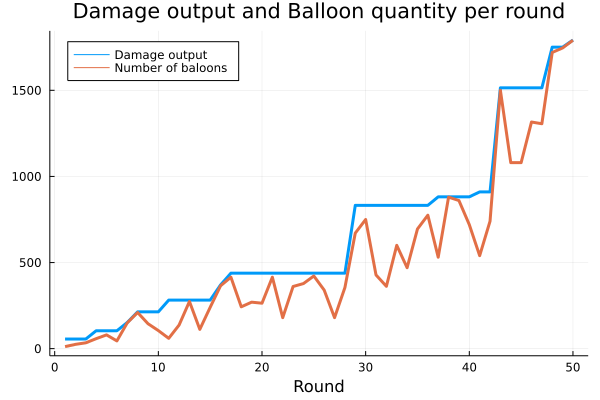

In [11]:
x = 1:50
using Plots
plot(x, balloons_plotting_info, title = "Damage output and Balloon quantity per round", 
    label = ["Damage output" "Number of baloons"], lw = 3, legend=:topleft, xlab = "Round")

As we can see in the plot below, our damage output is always above the number of balloons we must pop in that round, meaning we deal with all the balloons before we reach the end. An interesting thing to note is that we make several drastic jumps in our power round 29 and 43. We also have some long plateaus where we barely purchase or upgrade towers.

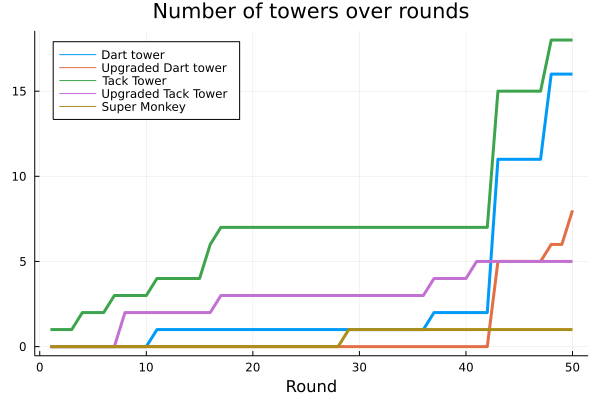

In [10]:

plot(x, tower_plotting_info, title = "Number of towers over rounds", 
    label = ["Dart tower" "Upgraded Dart tower" "Tack Tower" "Upgraded Tack Tower" "Super Monkey"], 
    lw = 3, legend=:topleft, xlab = "Round")

Here we see at which points we place our towers and it helps explain the damage output graph a little better. From about round 18 to round 29 we make very few purchases and at round 29 we purchase a Super monkey, the most expensive and most powerful tower in the game. It could be speculated that we were saving our money in easier rounds in order to buy it. Next at round 43 we make various purchases of Dart towers, Tack Towers and upgraded Tack towers. This can be explained by the sudden spike in enemies in that round. 

Lets try it in the real game!

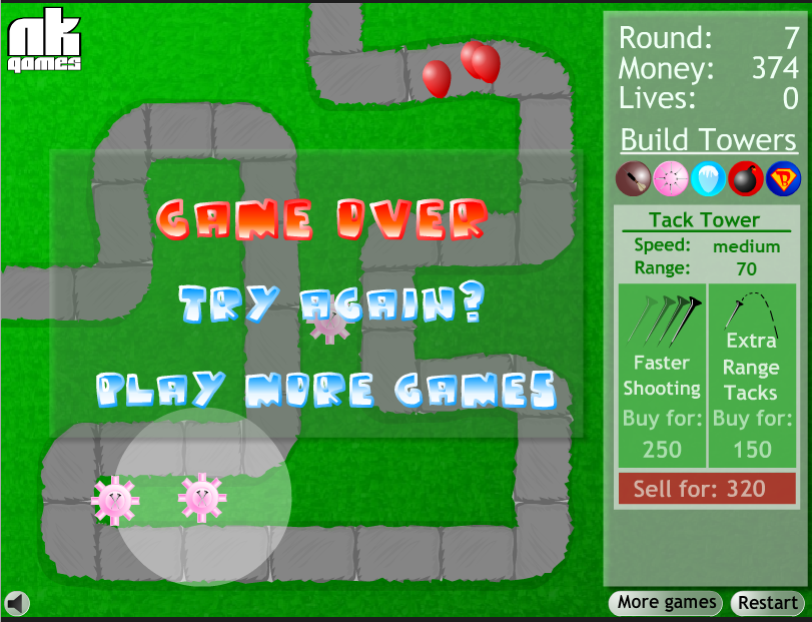

Whoops... Looks like we lost in round 7. The model does not take into account some details of the game. First of which is the speed of balloons along the path. We can see in the "Damage output and Balloon quantity per round" graph that there are times where the number of balloons goes down from one round to another. This is true but also misleading. Although the number of balloons might be less, the speed of these kind of balloons makes it so our towers don't have enough time deal damage to them. Also, our model waits until it is absolutely necessary to purchase a tower before doing so. It is already known what towers should go where and how much money we will spend in total but we wait with money in our account until we absolutely have to place them. Finally we did not take into account that towers of different types sinergise with each other. While the Tack tower can usually do more damage than the Dart tower it is good to have a mix of both since the Tack tower can often miss leading to balloons reaching the end of the path. The Dart tower never misses however, so it can be used to pick up stranglers that were missed by Tack towers. In our model we start by only purchasing Tack towers and wait until later rounds to purchase them leaving us in dire straits in the beginning.

## 5. Conclusion ##

In this project we met our goal of designing a Multi Period Planning problem that tells the player which towers to place, where to place them and in which round in order to minimize the amount of money spent for a simplified version of Bloons Tower Defense. We saw there were some tiles that would be ideals for two different types of towers but there is one choice that is objectively better. 

It was unfortunate that our model only made it to round 7. Perhaps the simplifying assumptions made the problem too simple compared to the original game. Regardless, I believe that with some small tweaks to how damage is calculated(namely taking into account balloon speed and the synergizing effect different towers have when placed together), we could develop a program that not only wins BTD but does so for minimal cost.

The performance of the model had some interesting quirks. It usually takes about 30 seconds to execute, which I believe is quite good for a model with more than 50,000 binary variables. But there were some choices of parameters that had the solver running for over 20 minutes without finding an answer. A value of over 390 for mul\[5\] (the multiplier for the Super Monkey) does this. I don't know why this happens since nothing similar happens with any other parameter and there does not seem to be anything unique about mul\[5\] or 390. Maybe the fact that logarithms are multiplied with this number causes something strange to occur.

Further work can be done in the damage calculations for each tower. As discussed earlier, this would bring our simulation closer to the reality of the game. Another thing is that placing towers closer to the beginning of the balloon's path is advantageous since it causes balloons to slow down. Giving more time for other towers to deal damage. Another interesting path to take (pun intended) is to look into the idea of selling towers. In BTD the player can sell a tower for 80% of its value. This returns capital to the player and allows a different tower to be placed at that spot. This could explore how some towers might be useful in the early game but take up important spaces that could be used by better towers once we have enough money.